In [54]:
%run Model.ipynb

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
akg_c --> co2_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c


## Wild type E.coli

Here we calculate the maximum growth rate and maximum bdo production in the wild type strain. These rates will later be compared to the rates arising from the different knock-out strains, to see if knocking out genes in a targeted manner can improve either the growth rate or the bdo production.

In [55]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 


print("Maximal growth rate:")
print(model_akg.slim_optimize())

print("Maximal bdo production rate:")
print(model_akg.slim_optimize())


Maximal growth rate:
0.876997214426983
Maximal bdo production rate:
0.876997214426983


Here we perform Phenotypic Phase Plane analysis for the wild type E.coli model 

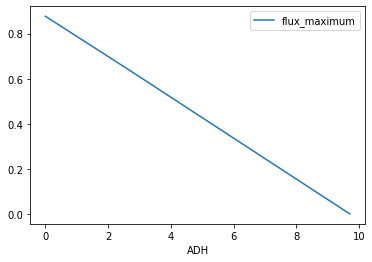

In [56]:
ppp_bdo = production_envelope(model_akg,
                    reactions=[model_akg.reactions.ADH],
                    objective=model_akg.reactions.BIOMASS_Ec_iML1515_core_75p37M )

pppp = ppp_bdo.plot(x='ADH', y='flux_maximum')
fig = pppp.get_figure()

The phenotypic phase plane analysis shows that there is a direct trade-off between production of the target compound and growth.



## Identify genes for targeted gene knock out

In [57]:
model.reactions.LDH_D.gene_reaction_rule 

'b1380'

In [58]:
model.reactions.MDH.gene_reaction_rule 

'b3236'

In [59]:
model.reactions.ALCD2x.gene_reaction_rule 

'b1241 or b1478'

In [60]:
model.reactions.PFL.gene_reaction_rule 



'( b0902 and b0903 ) or ( b0902 and b3114 ) or ( b3951 and b3952 ) or ( ( b0902 and b0903 ) and b2579 )'

## Gene knock-out strains

Ldh_d mutant

In [61]:
with model_akg as ldh_d_mutant:
    ldh_d_mutant.genes.b1380.knock_out()
    
    print("Maximal growth rate:")
    print(ldh_d_mutant.slim_optimize())

with model_akg as ldh_d_mutant:
    ldh_d_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(ldh_d_mutant.slim_optimize())

Maximal growth rate:
0.876997214426975
Maximal bdo production rate:
9.708085106382974


Mdh mutant

In [62]:
with model_akg as mdh_mutant:
    mdh_mutant.genes.b3236.knock_out()
    
    print("Maximal growth rate:")
    print(mdh_mutant.slim_optimize())

with model_akg as mdh_mutant:
    mdh_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(mdh_mutant.slim_optimize())

Maximal growth rate:
0.856444366957576
Maximal bdo production rate:
9.708085106382981


Adhe1 mutant 

In [63]:
with model_akg as adhe1_mutant:
    adhe1_mutant.genes.b1241.knock_out()
    
    print("Maximal growth rate:")
    print(adhe1_mutant.slim_optimize())
    
with model_akg as adhe1_mutant:
    adhe1_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(adhe1_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269893
Maximal bdo production rate:
9.708085106382988


Adhe2 mutant

In [64]:
with model_akg as adhe2_mutant:
    adhe2_mutant.genes.b1478.knock_out()

    
    print("Maximal growth rate:")
    print(adhe2_mutant.slim_optimize())
    
with model_akg as adhe2_mutant:
    adhe2_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(adhe2_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269484
Maximal bdo production rate:
9.708085106383017


Adhe12 mutant

In [65]:
with model_akg as adhe12_mutant:
    adhe12_mutant.genes.b1478.knock_out()
    adhe12_mutant.genes.b1241.knock_out()

    
    print("Maximal growth rate:")
    print(adhe12_mutant.slim_optimize())
    
with model_akg as adhe12_mutant:
    adhe12_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(adhe12_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269808
Maximal bdo production rate:
9.708085106382995


Pfl mutant 1

In [66]:
with model_akg as pfl1_mutant:
    pfl1_mutant.genes.b0902.knock_out()
    pfl1_mutant.genes.b0903.knock_out()
    
    print("Maximal growth rate:")
    print(pfl1_mutant.slim_optimize())
    
with model_akg as pfl1_mutant:
    pfl1_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(pfl1_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269701
Maximal bdo production rate:
9.70808510638299


Pfl mutant 2


In [67]:
with model_akg as pfl2_mutant:
    pfl2_mutant.genes.b0902.knock_out()
    pfl2_mutant.genes.b3114.knock_out()
    
    print("Maximal growth rate:")
    print(pfl2_mutant.slim_optimize())
    
with model_akg as pfl2_mutant:
    pfl2_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(pfl2_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269762
Maximal bdo production rate:
9.708085106383


Pfl mutant 3

In [68]:
with model_akg as pfl3_mutant:
    pfl3_mutant.genes.b3951.knock_out()
    pfl3_mutant.genes.b3952.knock_out()
    
    print("Maximal growth rate:")
    print(pfl3_mutant.slim_optimize())
    
with model_akg as pfl3_mutant:
    pfl3_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(pfl3_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269739
Maximal bdo production rate:
9.708085106382969


Pfl mutant 4

In [69]:
with model_akg as pfl4_mutant:
    pfl4_mutant.genes.b0902.knock_out()
    pfl4_mutant.genes.b0903.knock_out()
    pfl4_mutant.genes.b2579.knock_out()
    
    print("Maximal growth rate:")
    print(pfl4_mutant.slim_optimize())
    
with model_akg as pfl4_mutant:
    pfl4_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(pfl4_mutant.slim_optimize())

Maximal growth rate:
0.8769972144269745
Maximal bdo production rate:
9.708085106382988


As we see, knocking these genes out does not affect the growth rate or production of bdo. Here we knock out a combination of genes.

In [70]:
with model_akg as quadruple_mutant:
    quadruple_mutant.genes.b1380.knock_out()
    quadruple_mutant.genes.b3236.knock_out()
    quadruple_mutant.genes.b1478.knock_out()
    quadruple_mutant.genes.b0902.knock_out()
    quadruple_mutant.genes.b0903.knock_out()   
    
    print("Maximal growth rate:")
    print(quadruple_mutant.slim_optimize())

with model_akg as quadruple_mutant:
    quadruple_mutant.objective = model_akg.reactions.ADH
    print("Maximal bdo production rate:")
    print(quadruple_mutant.slim_optimize())

Maximal growth rate:
0.8564443669575732
Maximal bdo production rate:
9.708085106382985


## OptGene algorithm

In [ ]:
import cameo
from cameo.strain_design import OptGene
optgene = OptGene(model_akg)

result = optgene.run(target=model_akg.reactions.ADH,
                     biomass=model_akg.reactions.BIOMASS_Ec_iML1515_core_75p37M,
                     substrate=model_akg.metabolites.glc__D_e,
                     max_evaluations=5000,
                     plot=False)

In [ ]:
result

As presented above, OptGene returns no optimization targets

In [ ]:
optgene = OptGene(model_akg)


In [ ]:
result = optgene.run(target=model_akg.reactions.EX_bdo, 
                     biomass=model_akg.reactions.BIOMASS_Ec_iML1515_core_75p37M,
                     substrate=model_akg.metabolites.glc__D_e,
                     max_evaluations=20000, population_size=200, max_knockouts=5,
                     plot=False, growth_coupled=True)

In [ ]:
result

In [ ]:
result = optknock.run(max_knockouts=1, target="EX_bdo", biomass="BIOMASS_Ec_iML1515_core_75p37M")


In [98]:
import cameo 
from cameo.strain_design.deterministic.linear_programming import OptKnock


In [101]:
optknock = OptKnock(model, fraction_of_optimum=0.1)


C:\Users\tzimo\anaconda3\lib\site-packages\cameo\strain_design\deterministic\linear_programming.py:118: UserWarning: You are trying to run OptKnock with glpk_interface. This might not end well.
  warnings.warn("You are trying to run OptKnock with %s. This might not end well." %


Infeasible: None (infeasible).